## Pandas을 이용한 시각화
- matplotlib를 이용한 시각화 : 한땀한땀 직접 그려볼 수 있다. 커스터마이징에 용이
- pandas, seaborn을 이용한 시각화 : 손쉽게 차트를 그려볼 수 있다.
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
- https://matplotlib.org/stable/users/explain/colors/colormaps.html

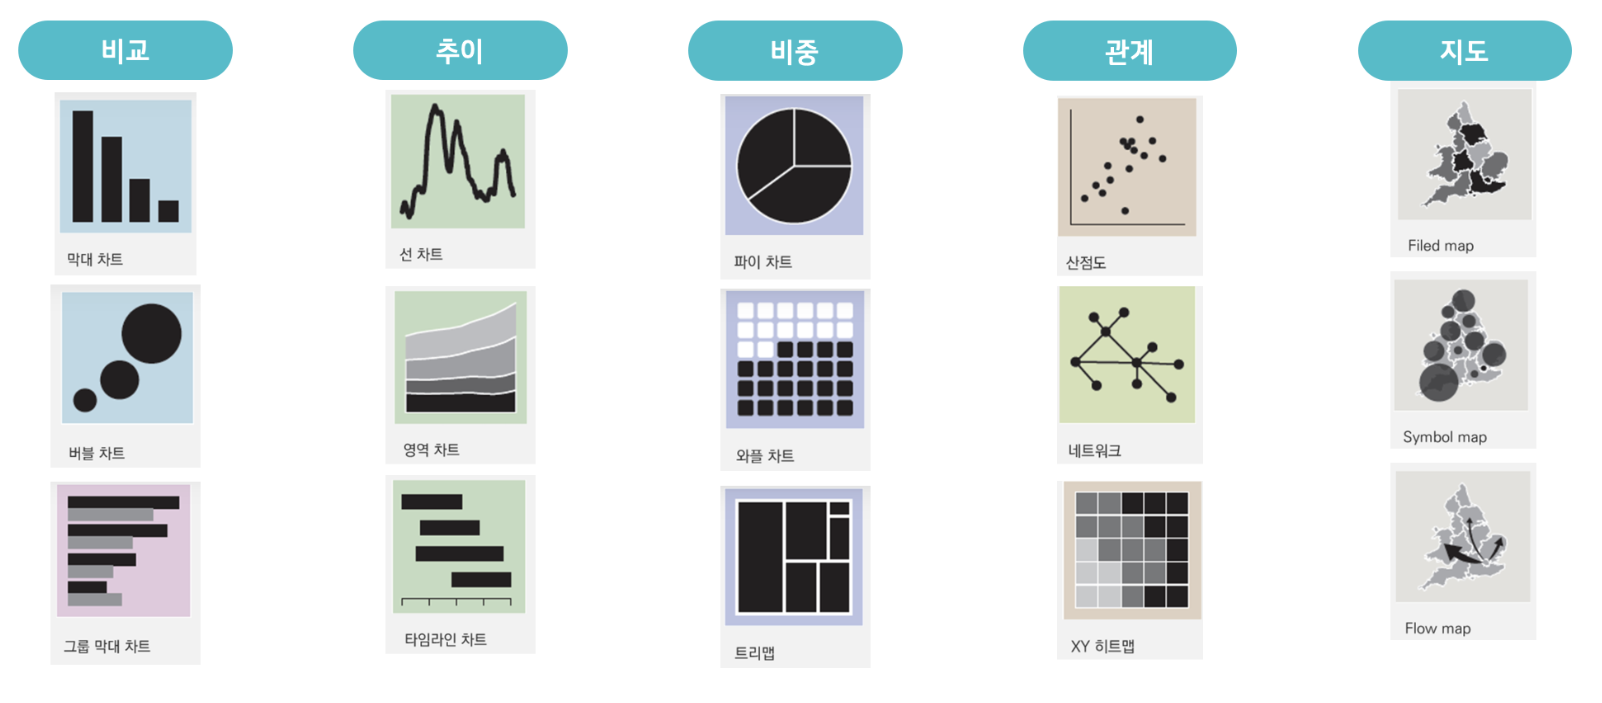

In [1]:
import pandas as pd

### 1. line chart

#### 연도별 입사자 추세 확인하기

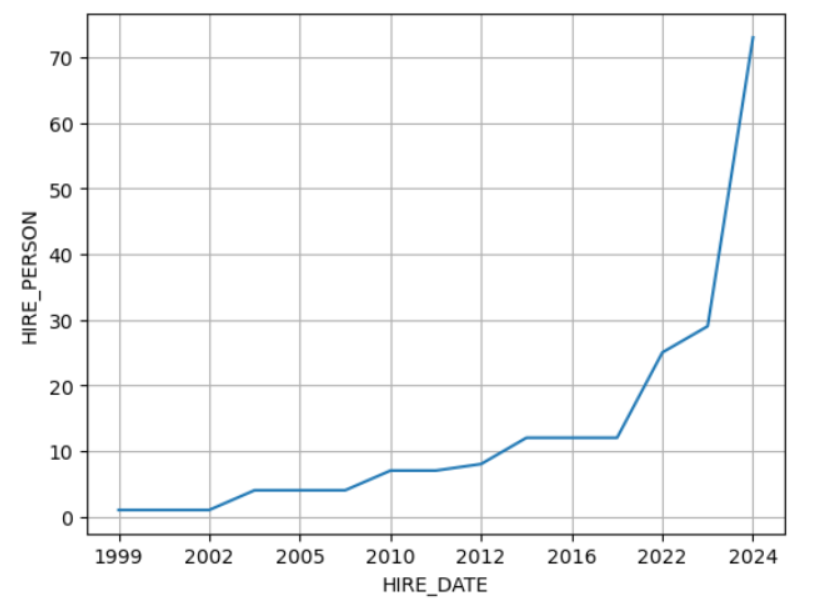

In [2]:
# hr데이터 로딩(os 모듈 이용X)
# parse_dates : 날짜 타입으로 변환할 컬럼 설정
hr_info = pd.read_csv("./data/hr-info.csv", encoding='euc-kr', parse_dates=['HIRE_DATE'])  # str -> 날짜 타입으로 변환
hr_info.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


In [3]:
# 입사연도 추출하기
hr_info['HIRE_DATE'].dt.year

0      1999
1      2000
2      2002
3      2006
4      2005
       ... 
195    2024
196    2024
197    2024
198    2024
199    2024
Name: HIRE_DATE, Length: 200, dtype: int32

In [4]:
# 새로운 컬럼으로 추가
hr_info['HIRE_YEAR'] = hr_info['HIRE_DATE'].dt.year
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,HIRE_YEAR
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,1999
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,...,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,2000
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,2002
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,...,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,2006
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,...,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,...,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,...,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,...,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,...,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024


In [5]:
# 연도별로 입사자 수 파악하기
# group by
hr_info_agg = hr_info.groupby(by='HIRE_YEAR').agg({'ENAME': 'count'})
hr_info_agg

,ENAME
HIRE_YEAR,
1999,1
2000,1
2002,1
2004,4
2005,4
2006,4
2010,7
2011,7
2012,8


<Axes: xlabel='HIRE_DATE', ylabel='HIRE_COUNT'>

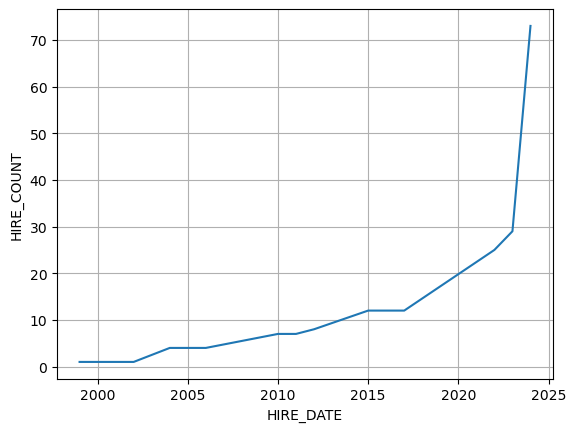

In [6]:
# 연도별로 입사자 수 파악하기
# value count
hr_info['HIRE_YEAR'].value_counts().sort_index().plot(kind='line',
                                                     xlabel='HIRE_DATE',
                                                     ylabel='HIRE_COUNT',
                                                     grid=True)

### 2. bar chart

#### 학위별 평균연봉 비교해보기

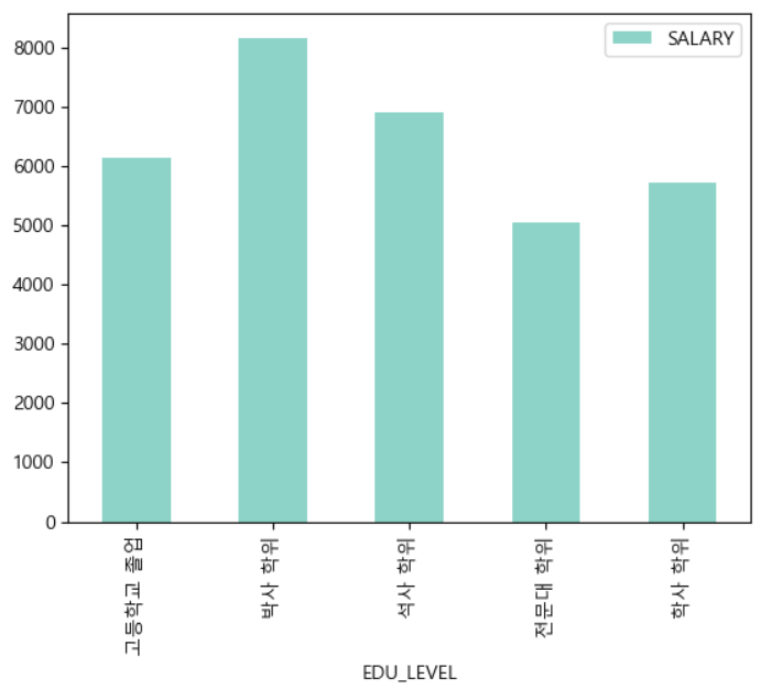

In [7]:
# 한글 폰트 적용
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

<Axes: xlabel='EDU_LEVEL'>

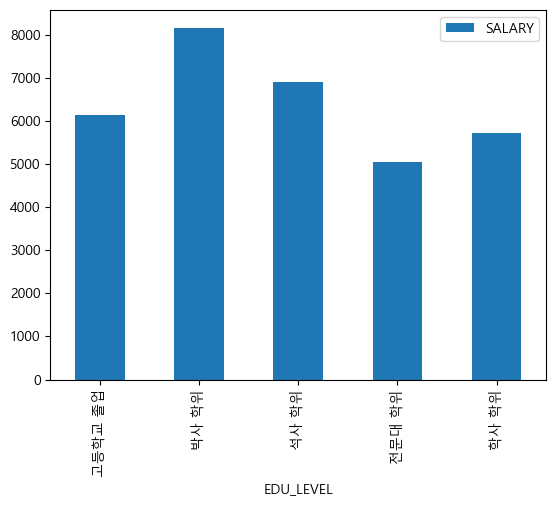

In [8]:
hr_info.groupby(by='EDU_LEVEL').agg({'SALARY': 'mean'}).plot(kind='bar',
                                                     xlabel='EDU_LEVEL')

<Axes: xlabel='EDU_LEVEL'>

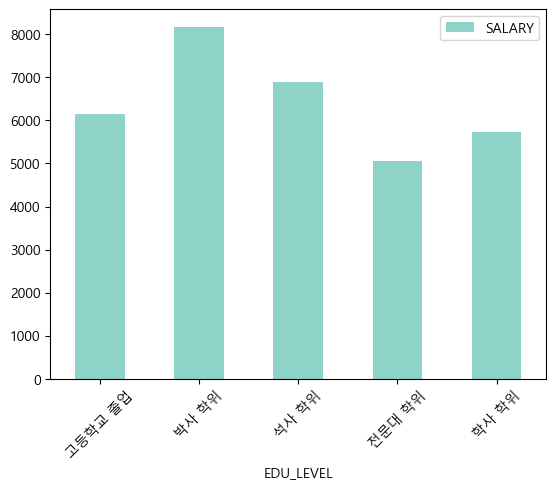

In [9]:
hr_info[['EDU_LEVEL', 'SALARY']].groupby(by='EDU_LEVEL').mean().plot(kind='bar',
                                                                     rot=45,
                                                                     colormap='Set3')

#### 학위/성별 별 평균연봉 비교

<Axes: xlabel='EDU_LEVEL,GENDER'>

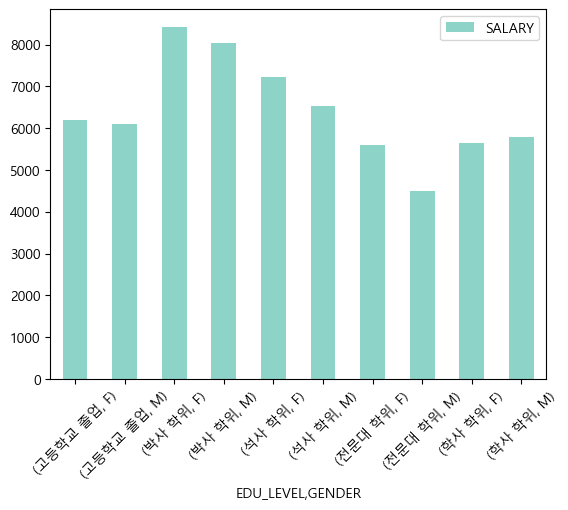

In [10]:
hr_info[['EDU_LEVEL', 'SALARY', 'GENDER']].groupby(by=['EDU_LEVEL', 'GENDER']).mean().plot(kind='bar',
                                                                     rot=45,
                                                                     colormap='Set3')

<Axes: title={'center': '교육수준과 성별에 따른 평균연봉 비교'}, xlabel='평균연봉', ylabel='교육수준'>

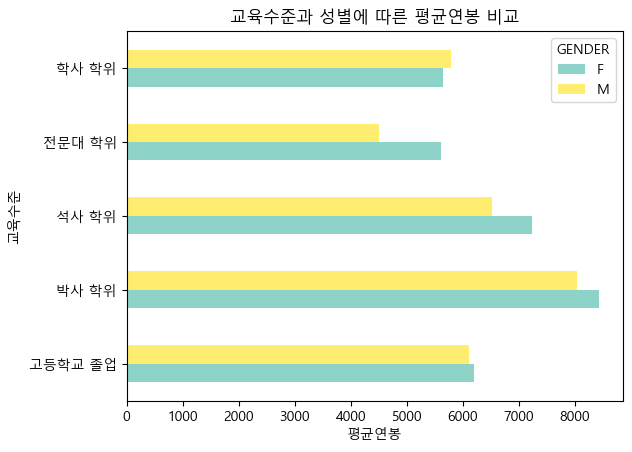

In [26]:
# 같은 학위끼리 합치기
salary_mean = hr_info[['EDU_LEVEL', 'SALARY', 'GENDER']].groupby(by=['EDU_LEVEL', 'GENDER']).mean().round(1)
# salary_mean  # 인덱스가 10가지

# 데이터 재구조화
salary_mean.reset_index().pivot(index='EDU_LEVEL', columns='GENDER', values='SALARY').plot(kind='barh',
                                                                                          colormap='Set3',
                                                                                          xlabel='평균연봉',
                                                                                          ylabel='교육수준',
                                                                                          title='교육수준과 성별에 따른 평균연봉 비교',
                                                                                          subplots=True)

#### [실습] 부서별 평균 연봉 비교하기
- figsize : 그림의 크기를 조절하는 속성 -> figsize(10, 5) -> 가로, 세로 inch 단위
- ylim : y축 limit 설정 -> ylim(4000, 7000) -> 축의 최소, 최대 값 설정

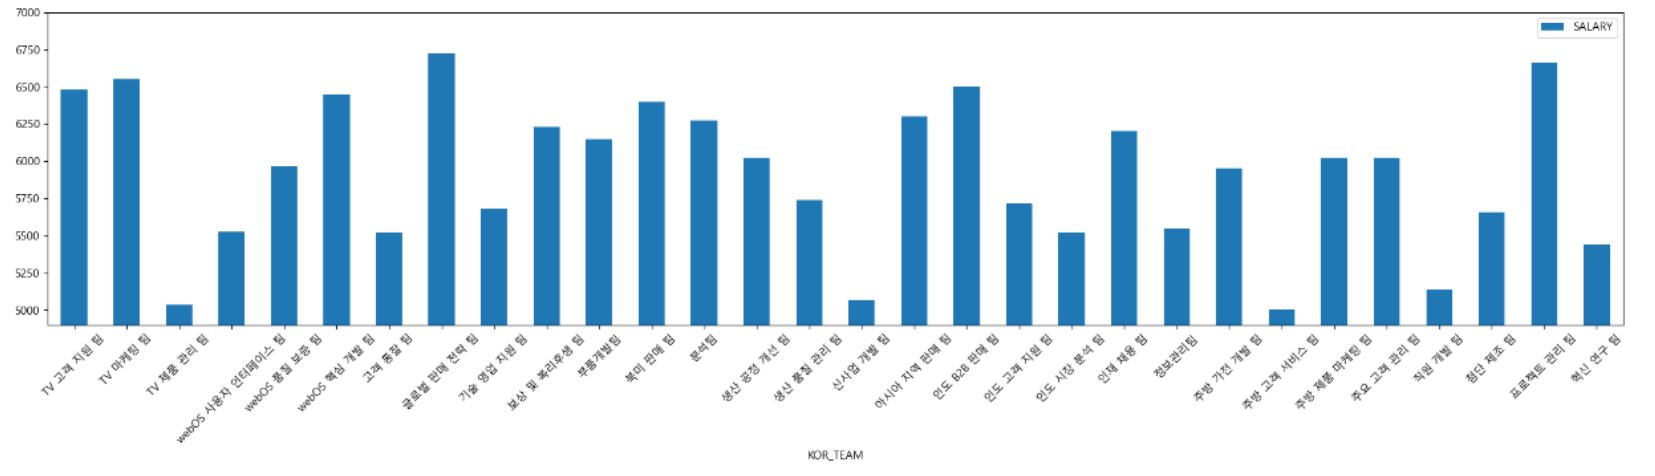

In [12]:
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,HIRE_YEAR
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,1999
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,...,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,2000
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,2002
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,...,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,2006
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,...,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,...,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,...,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,...,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,...,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,2024


In [13]:
org_info = pd.read_csv("./data/org-info.csv", encoding='euc-kr', index_col="ORG_CD")
org_info.head()

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
ORG_CD,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다."
ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.
ORG004,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Core Development Team,webOS 핵심 개발 팀,webOS 플랫폼의 핵심 기능 개발 및 유지보수를 담당합니다.
ORG005,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS User Interface Team,webOS 사용자 인터페이스 팀,webOS의 사용자 인터페이스 디자인 및 개선을 담당합니다.


In [14]:
# 조직정보와 구성원 정보를 merge
# ORG_CD를 중심으로 진행
org_hr_merge = pd.merge(hr_info, org_info, on='ORG_CD')
org_hr_merge.shape  # ceo, 사장, 부사장은 소속정보가 없어서 제외

(197, 28)

In [15]:
# 부서별 평균연봉 구하기
team_salary_mean = org_hr_merge[['SALARY', 'KOR_TEAM']].groupby(by='KOR_TEAM').mean()

<Axes: xlabel='KOR_TEAM'>

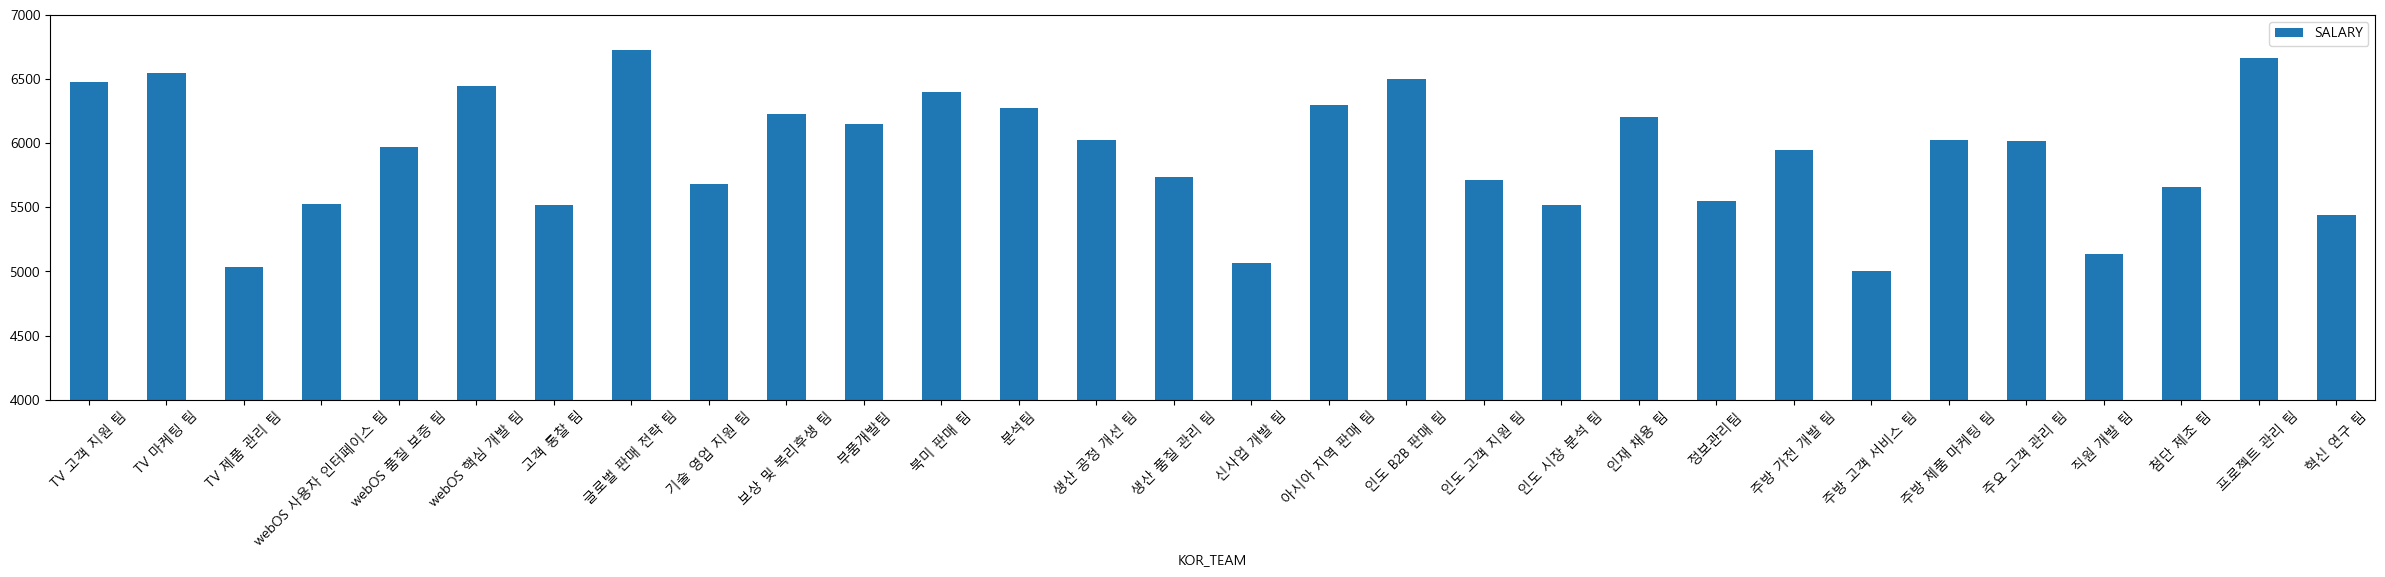

In [16]:
# 데이터시각화
team_salary_mean.plot(kind='bar',
                     figsize=(30, 5),
                     rot=45,
                     ylim=(4000, 7000))

### 3. pie chart
- 파이차트는 정각을 기준으로 그리면 명확하다

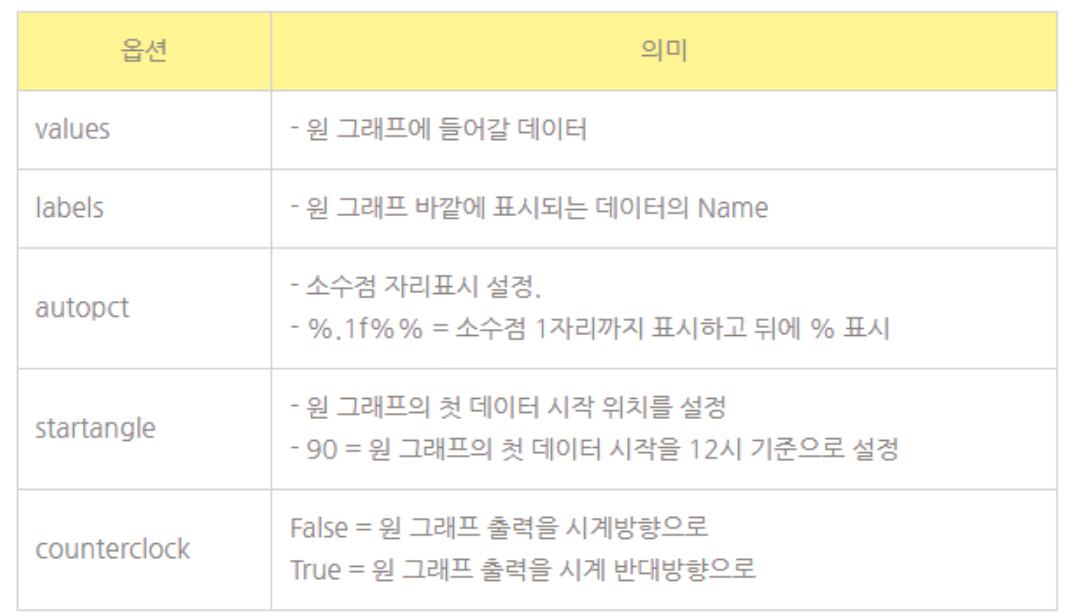

#### 각 부서별 인원 수 확인

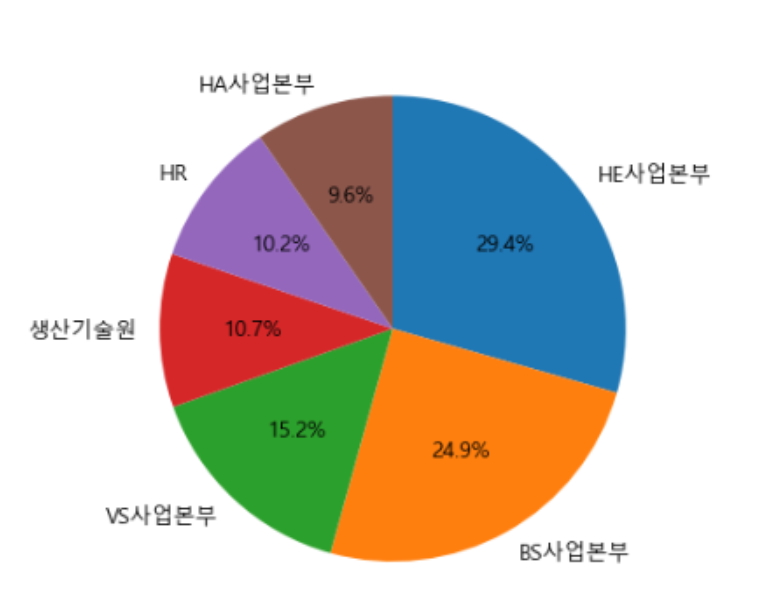

<Axes: title={'center': '각 본부의 민원비율'}>

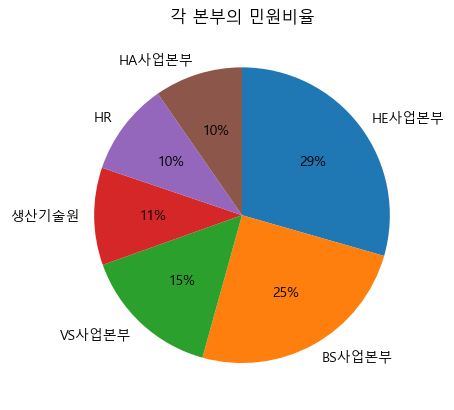

In [17]:
org_hr_merge['KOR_DIVISION'].value_counts().plot(kind='pie',
                                                startangle=90,
                                                counterclock=False,
                                                autopct='%.lf%%',
                                                ylabel='',
                                                title='각 본부의 민원비율')

### 4. scatter(산점도)
- x축과 y축이 수치형으로 되어있을 때 분포와 경향을 보기 위해 사용

#### 나이에 따른 연봉 변화

<Axes: xlabel='AGE', ylabel='SALARY'>

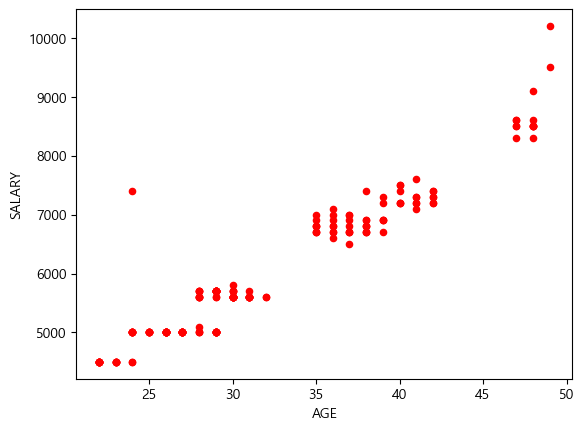

In [18]:
hr_info.plot(kind='scatter', x='AGE', y='SALARY', color='red')
# 상관계수
# 점이 퍼진다 -> 상관관계가 떨어진다.

## Seaborn 패키지를 이용한 차트
- matplotlib를 기반으로한 데이터 시각화 도구
- 화려하고 다양한 형태의 그래프를 손쉽게 활용할 수 있음
- 사용하기 편하다

### 1. 히스토그램

#### 성별에 다른 연봉 히스토그램
- 구간화를 해준다

In [19]:
import seaborn as sns

<Axes: xlabel='SALARY', ylabel='Count'>

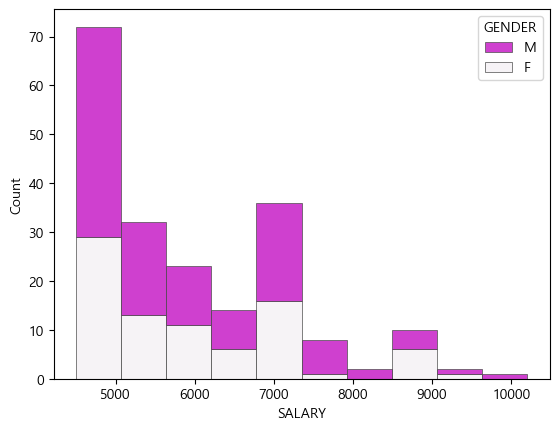

In [20]:
sns.histplot(
    hr_info,  # 사용할 데이터
    x="SALARY", hue="GENDER",  # hue 데이터를 한번 더 가른다
    multiple="stack",  # 합쳐서
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    # log_scale=True,
)

### 2. 버블차트

#### 나이와 근속 연수에 따른 부서별 연봉 비교

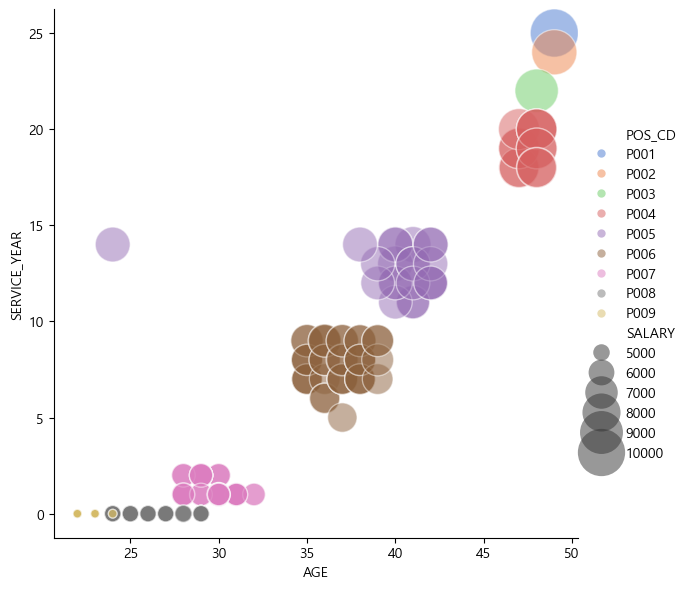

In [21]:
sns.relplot(x="AGE", y="SERVICE_YEAR", hue="POS_CD", size="SALARY",
            sizes=(40, 1200), alpha=.5, palette="muted",
            height=6, data=hr_info)

### 3. 히트맵

#### 상관계수 시각화

In [22]:
# seaborn 버전 확인
# !pip list

In [23]:
# 버전변경
# !pip install seaborn==0.13.0

In [24]:
hr_corr = hr_info[['PERFORMANCE_SCORE', 'SALARY', 'AGE', 'SERVICE_YEAR', 'TRAINING_HOURS']].corr()
hr_corr

,PERFORMANCE_SCORE,SALARY,AGE,SERVICE_YEAR,TRAINING_HOURS
PERFORMANCE_SCORE,1.000000,0.609152,0.582203,0.492801,0.551200
SALARY,0.609152,1.000000,0.961699,0.970875,0.628931
AGE,0.582203,0.961699,1.000000,0.932563,0.575867
SERVICE_YEAR,0.492801,0.970875,0.932563,1.000000,0.559911
TRAINING_HOURS,0.551200,0.628931,0.575867,0.559911,1.000000


<Axes: >

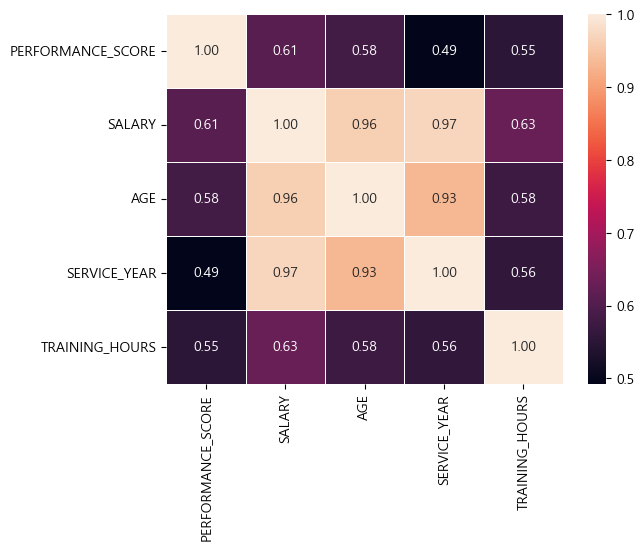

In [25]:
sns.heatmap(hr_corr, annot=True, fmt=".2f", linewidths=.5)